# Bitcoin Death Cross

## Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from finta import TA

## Read data

In [14]:
df = pd.read_csv('BTC-USD.csv', parse_dates=True, index_col=[0])

In [15]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-24,9632.149414,9680.367188,9278.233398,9313.610352,9313.610352,1.896172e+10
2020-06-25,9314.126953,9340.161133,9095.324219,9264.813477,9264.813477,1.861605e+10
2020-06-26,9260.995117,9310.516602,9101.738281,9162.917969,9162.917969,1.834147e+10
2020-06-27,9167.824219,9207.810547,8998.216797,9045.390625,9045.390625,1.727309e+10
2020-06-28,9048.460938,9197.546875,8975.525391,9143.582031,9143.582031,1.456087e+10


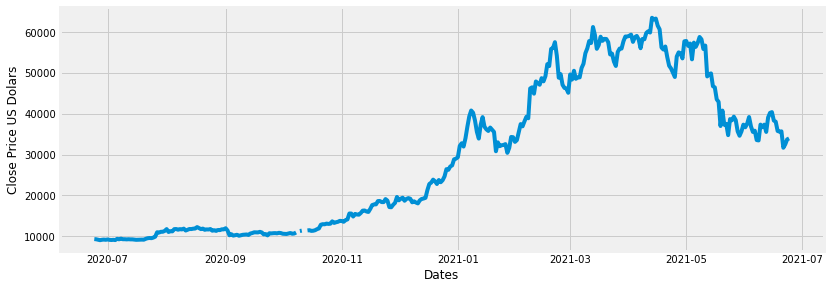

In [16]:
plt.figure(figsize = (12.2, 4.5))
plt.plot(df['Close'])
plt.xlabel('Dates')
plt.ylabel('Close Price US Dolars')
plt.show()

In [5]:
df.isnull().sum()

Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [6]:
df.dropna(inplace =True)

In [17]:
df.columns = df.columns.str.lower()

In [18]:
df.head()

,open,high,low,close,adj close,volume
Date,,,,,,
2020-06-24,9632.149414,9680.367188,9278.233398,9313.610352,9313.610352,1.896172e+10
2020-06-25,9314.126953,9340.161133,9095.324219,9264.813477,9264.813477,1.861605e+10
2020-06-26,9260.995117,9310.516602,9101.738281,9162.917969,9162.917969,1.834147e+10
2020-06-27,9167.824219,9207.810547,8998.216797,9045.390625,9045.390625,1.727309e+10
2020-06-28,9048.460938,9197.546875,8975.525391,9143.582031,9143.582031,1.456087e+10


In [19]:
df['shortSMA']= TA.SMA(df, period=50, column='close')
df['longSMA']=TA.SMA(df, period=200, column='close')

In [20]:
# select columns
select_cols = ['close','shortSMA','longSMA' ]

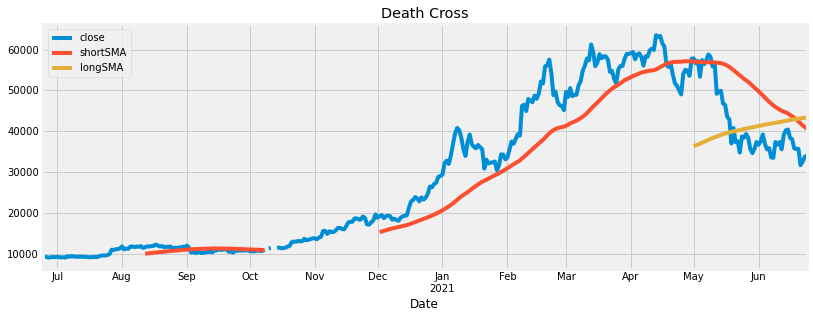

In [21]:
df[select_cols].plot(figsize=(12.2, 4.5)).set_title('Death Cross');

In [29]:
# Create a funtion to see dates of death cross and golden cross
def death_golden_cross():
    first_cross = 0
    #loop throut the data
    for i in range(0, len(df)):
        if df['shortSMA'][i] < df['longSMA'][i] and first_cross==0:
            print('Death Cross on date:', df.index[i], ': expecte price to continue to fall')
            first_cross = 1
        elif df['shortSMA'][i] > df['longSMA'][i] and first_cross==1:
            print('Golden Cross on date:',  df.index[i], ': expecte price to continue to rise')
            first_cross = 0

In [30]:
# show the dates to death cross and golden cross
death_golden_cross()

Death Cross on date: 2021-06-19 00:00:00 : expecte price to continue to fall
